# Time between Last Fire and Debris flow

- calculate the time between events to include as a feature
    - could be a good parameter for the model and for users in the final data product
- also desire to calculate the NUMBER of fires in the site

In [1]:
import os
import pandas as pd
import geopandas as gpd
import datetime as dt

# import requests, json, folium

In [2]:
file_path = "../../data/data_v07_landslide.parquet"
df = gpd.read_parquet(file_path)
print('raw data -',df.shape)

df.head()

raw data - (1550, 48)


,fire_name,year,fire_id,fire_segid,database,state,response,stormdate,gaugedist_m,stormstart,...,Extinction moisture content,Igneous,Metamorphic,Sedimentary,Unconsolidated,domrt,index_right,LNDS_RISKV,LNDS_RISKS,LNDS_RISKR
0,Buckweed,2007,bck,bck_1035,Training,CA,0,22,1998.67,2008-01-21 16:27:00,...,15.000000,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High
1,Buckweed,2007,bck,bck_1090,Training,CA,0,22,2368.93,2008-01-21 16:27:00,...,15.000000,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High
2,Buckweed,2007,bck,bck_1570,Training,CA,0,22,3956.74,2008-01-21 16:27:00,...,15.099213,0.0,0.973247,0.026753,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High
3,Buckweed,2007,bck,bck_235,Training,CA,0,22,1734.72,2008-01-21 15:47:00,...,15.093254,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High
4,Buckweed,2007,bck,bck_363,Training,CA,0,22,1801.04,2008-01-21 15:47:00,...,15.092942,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High


In [100]:
cols = [
    'year', # year of wildfire
    'stormdate', # date of storm that produced debris-flow response
    'stormstart', # date and time that storm started
    'stormend', # date and time that storm ended
]

print("nan_count:")
print(df[cols].isna().sum())

df[cols]

nan_count:
year            0
stormdate       0
stormstart    160
stormend      160
dtype: int64


,year,stormdate,stormstart,stormend
0,2007,22,2008-01-21 16:27:00,2008-01-22 19:20:00
1,2007,22,2008-01-21 16:27:00,2008-01-22 19:20:00
2,2007,22,2008-01-21 16:27:00,2008-01-22 19:20:00
3,2007,22,2008-01-21 15:47:00,2008-01-22 19:39:00
4,2007,22,2008-01-21 15:47:00,2008-01-22 19:39:00
...,...,...,...,...
1545,2011,7,2011-09-07 15:00:00,2011-09-07 15:55:00
1546,2011,11,2011-07-11 14:45:00,2011-07-11 16:15:00
1547,2011,26,2011-07-26 10:45:00,2011-07-26 11:45:00
1548,2011,15,2011-08-15 11:00:00,2011-08-15 12:00:00


## encoding logic for fire interval

- there are a significant number of records where the fire of record occurred *after* the debris flow. we should encode these as 1's
- the fire data is not granular, so we only have the year of the fire even though we have the date of the storm. many fires ocurred in the same year as the debrisflow
    - because we are subtracting simply the years, this will cause the time difference to be zero
- the remaining records will show a time greater than to handle this, offset the years of the fire by 1

In [5]:
# this change should take care of up to 160 NaNs!
df['fire_interval'] = df['year'] - pd.to_datetime(df['stormdate']).dt.year
#df['fire_interval'] = df['year'] - pd.to_datetime(df['stormstart']).dt.year
df

,fire_name,year,fire_id,fire_segid,database,state,response,stormdate,gaugedist_m,stormstart,...,Igneous,Metamorphic,Sedimentary,Unconsolidated,domrt,index_right,LNDS_RISKV,LNDS_RISKS,LNDS_RISKR,fire_interval
0,Buckweed,2007,bck,bck_1035,Training,CA,0,22,1998.67,2008-01-21 16:27:00,...,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High,-1.0
1,Buckweed,2007,bck,bck_1090,Training,CA,0,22,2368.93,2008-01-21 16:27:00,...,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High,-1.0
2,Buckweed,2007,bck,bck_1570,Training,CA,0,22,3956.74,2008-01-21 16:27:00,...,0.0,0.973247,0.026753,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High,-1.0
3,Buckweed,2007,bck,bck_235,Training,CA,0,22,1734.72,2008-01-21 15:47:00,...,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High,-1.0
4,Buckweed,2007,bck,bck_363,Training,CA,0,22,1801.04,2008-01-21 15:47:00,...,0.0,1.000000,0.000000,0.0,Metamorphic,205,380675.353544,96.305814,Relatively High,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,Wallow,2011,wlw,wlw_47409,Test,AZ,0,7,2706.25,2011-09-07 15:00:00,...,1.0,0.000000,0.000000,0.0,Igneous,102,245876.108811,94.282043,Relatively Moderate,0.0
1546,Wallow,2011,wlw,wlw_47535,Test,AZ,0,11,2891.75,2011-07-11 14:45:00,...,1.0,0.000000,0.000000,0.0,Igneous,102,245876.108811,94.282043,Relatively Moderate,0.0
1547,Wallow,2011,wlw,wlw_47535,Test,AZ,0,26,2891.75,2011-07-26 10:45:00,...,1.0,0.000000,0.000000,0.0,Igneous,102,245876.108811,94.282043,Relatively Moderate,0.0
1548,Wallow,2011,wlw,wlw_47535,Test,AZ,0,15,2891.75,2011-08-15 11:00:00,...,1.0,0.000000,0.000000,0.0,Igneous,102,245876.108811,94.282043,Relatively Moderate,0.0


In [6]:
df['fire_interval'].value_counts(dropna=False)

 0.0     849
-1.0     497
 NaN     160
-10.0     30
 4.0      10
-2.0       3
 3.0       1
Name: fire_interval, dtype: int64

In [7]:
# encode nans
df['fire_interval'] = df['fire_interval'].fillna(9999)

In [12]:
df['fire_interval'].value_counts(dropna=False).sort_index()

-10.0       30
-2.0         3
-1.0       497
 0.0       849
 3.0         1
 4.0        10
 9999.0    160
Name: fire_interval, dtype: int64

In [14]:
# there is small but not insignificant proportion where the fire is after the rain event
df[df['fire_interval'] > 0]['response'].value_counts()

0    146
1     25
Name: response, dtype: int64

In [59]:
# these should be recoded to a consistent positive number
# 1 is arbitrary
# fear is that model will treat 1 on the same scale as -1


df.loc[df['fire_interval'] > 0, 'fire_interval'] = 1 # updating to 1

df['fire_interval'] = df['fire_interval'].astype(int)

df['fire_interval'].value_counts().sort_index()

-10     30
-2       3
-1     497
 0     849
 1     171
Name: fire_interval, dtype: int64

In [64]:
# reverse the sign
df['fire_interval'] = df['fire_interval'] * -1

df['fire_interval'].value_counts().sort_index()

-1     171
 0     849
 1     497
 2       3
 10     30
Name: fire_interval, dtype: int64

In [ ]:
# here on out, fire interval with -1 means there was no fire before debris flow

In [66]:
# would be better to categorically encode?
df_dummies = pd.get_dummies(df['fire_interval'], prefix='fire_int')
df_dummies

,fire_int_-1,fire_int_0,fire_int_1,fire_int_2,fire_int_10
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1545,0,1,0,0,0
1546,0,1,0,0,0
1547,0,1,0,0,0
1548,0,1,0,0,0


In [67]:
df_dummies.columns

Index(['fire_int_-1', 'fire_int_0', 'fire_int_1', 'fire_int_2', 'fire_int_10'], dtype='object')

In [72]:
df_dummies = df_dummies.rename({'fire_int_-1': 'fire_int_never'}, axis=1)
df_dummies

,fire_int_never,fire_int_0,fire_int_1,fire_int_2,fire_int_10
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1545,0,1,0,0,0
1546,0,1,0,0,0
1547,0,1,0,0,0
1548,0,1,0,0,0


In [80]:
# these have the same index so can simply merge
# will retain geo-df format

df = df.merge(df_dummies, left_index=True, right_index=True)

df.shape

(1550, 54)

In [81]:
df

,fire_name,year,fire_id,fire_segid,database,state,response,stormdate,gaugedist_m,stormstart,...,index_right,LNDS_RISKV,LNDS_RISKS,LNDS_RISKR,fire_interval,fire_int_never,fire_int_0,fire_int_1,fire_int_2,fire_int_10
0,Buckweed,2007,bck,bck_1035,Training,CA,0,22,1998.67,2008-01-21 16:27:00,...,205,380675.353544,96.305814,Relatively High,1,0,0,1,0,0
1,Buckweed,2007,bck,bck_1090,Training,CA,0,22,2368.93,2008-01-21 16:27:00,...,205,380675.353544,96.305814,Relatively High,1,0,0,1,0,0
2,Buckweed,2007,bck,bck_1570,Training,CA,0,22,3956.74,2008-01-21 16:27:00,...,205,380675.353544,96.305814,Relatively High,1,0,0,1,0,0
3,Buckweed,2007,bck,bck_235,Training,CA,0,22,1734.72,2008-01-21 15:47:00,...,205,380675.353544,96.305814,Relatively High,1,0,0,1,0,0
4,Buckweed,2007,bck,bck_363,Training,CA,0,22,1801.04,2008-01-21 15:47:00,...,205,380675.353544,96.305814,Relatively High,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,Wallow,2011,wlw,wlw_47409,Test,AZ,0,7,2706.25,2011-09-07 15:00:00,...,102,245876.108811,94.282043,Relatively Moderate,0,0,1,0,0,0
1546,Wallow,2011,wlw,wlw_47535,Test,AZ,0,11,2891.75,2011-07-11 14:45:00,...,102,245876.108811,94.282043,Relatively Moderate,0,0,1,0,0,0
1547,Wallow,2011,wlw,wlw_47535,Test,AZ,0,26,2891.75,2011-07-26 10:45:00,...,102,245876.108811,94.282043,Relatively Moderate,0,0,1,0,0,0
1548,Wallow,2011,wlw,wlw_47535,Test,AZ,0,15,2891.75,2011-08-15 11:00:00,...,102,245876.108811,94.282043,Relatively Moderate,0,0,1,0,0,0


In [82]:
df.isna().sum()

fire_name                        0
year                             0
fire_id                          0
fire_segid                       0
database                         0
state                            0
response                         0
stormdate                        0
gaugedist_m                      0
stormstart                     160
stormend                       160
stormdur_h                       0
stormaccum_mm                    0
stormavgi_mmh                    0
peak_i15_mmh                   230
peak_i30_mmh                   214
peak_i60_mmh                   256
contributingarea_km2             0
prophm23                         0
dnbr1000                        77
kf                               0
acc015_mm                      230
acc030_mm                      214
acc060_mm                      256
geom                             0
lon                              0
lat                              0
SiteID                           0
NB                  

In [95]:
df['stormdate'].value_counts(dropna=False).sort_index()

1      50
2      16
3      11
4      55
5      83
7      28
8       3
9      30
10     42
11    107
12    289
13    190
14     15
15     34
16     33
17     10
18    105
19      3
20     95
21      7
22     76
23     73
24     16
25     82
26      8
27     53
28     17
29      2
30      3
31     14
Name: stormdate, dtype: int64

In [86]:
df[df['peak_i15_mmh'].isna()].isna().sum()

fire_name                        0
year                             0
fire_id                          0
fire_segid                       0
database                         0
state                            0
response                         0
stormdate                        0
gaugedist_m                      0
stormstart                     120
stormend                       120
stormdur_h                       0
stormaccum_mm                    0
stormavgi_mmh                    0
peak_i15_mmh                   230
peak_i30_mmh                   185
peak_i60_mmh                   122
contributingarea_km2             0
prophm23                         0
dnbr1000                         0
kf                               0
acc015_mm                      230
acc030_mm                      185
acc060_mm                      122
geom                             0
lon                              0
lat                              0
SiteID                           0
NB                  

In [96]:
import seaborn as sns

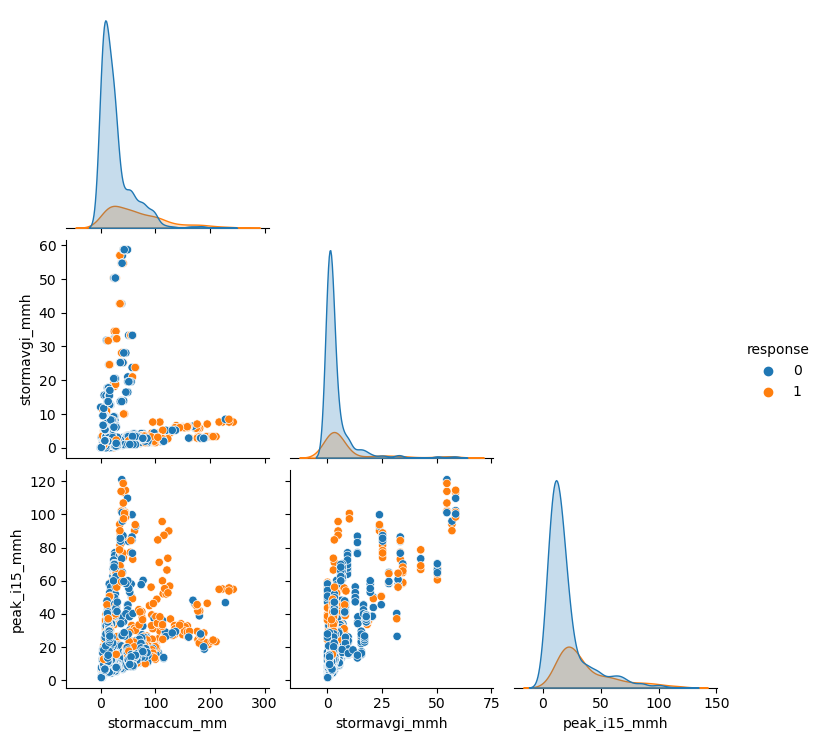

In [99]:
sns.pairplot(df[['stormaccum_mm', 'stormavgi_mmh', 'peak_i15_mmh', 'response']], 
             hue='response', 
             corner=True)

better would be DAYS between fire and DF. currently do not have more granular daterange for wildfire
- proceding with broader feature to test model results

In [17]:
#download the file with risk score in parquet format
df.to_parquet("../../data/data_v08_fire_interval.parquet")